# 네이버 뉴스 

In [3]:
from datetime import datetime

date = datetime.today().strftime('%Y%m%d')

In [4]:
url = 'https://news.naver.com/main/ranking/popularDay.naver?date={}'.format(date)
url

'https://news.naver.com/main/ranking/popularDay.naver?date=20230627'

In [6]:
import requests
from bs4 import BeautifulSoup

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')

soup.title.get_text()

'랭킹뉴스 : 네이버 뉴스'

### 뉴스 타이틀 가져오기

In [8]:
soup.select_one('div.list_content>a').get_text()

'비행기 창문에 스티커 놀이…논쟁 불씨 지핀 사진 한 장'

In [10]:
titles = soup.select('div.list_content>a')
len(titles)

news_titles = []
for t in titles:
    news_titles.append(t.text)
    print(t.text)
    

비행기 창문에 스티커 놀이…논쟁 불씨 지핀 사진 한 장
"피자에 머리카락" 환불 요구한 손님…4년 전 사진이었다
[스프] 드디어 시행되는 '만 나이 통일법', 바뀌는 것과 안 바뀌는 것
전 여친 집 침입한 그 시기, 홈캠으로 '17일간 683회' 훔쳐봤다
1시간 주차비가 9만 원…오피스텔 주차장에 무슨 일이
[르포] 상가 주차장 입구 6일째 막아도 견인 못해…분노 폭발
프리고진 '오리알' 되나…충성하던 용병들 "몰상식했다" 등돌려
'양육비 달라' 아이 아빠 얼굴사진 들고 시위…미혼모 유죄
정유정, 110차례 흉기 휘둘러…부친에 살인예고 전화도
나란히 침묵깨고 수습나선 푸틴과 프리고진…"단결에 감사"
주차장 입구 막은 지 벌써 닷새째…인천 주차 빌런 체포 영장도 검토
하루 36차례 전투...우크라이나 승기 잡을까?
원자력학회장 "후쿠시마 오염수 10L 마셔도 X-레이 1번 찍는 수준"
검찰, '마약 혐의' 전두환 손자 전우원 소환조사
"北 주민 천40만 명 인도적 지원 필요...식량 불안 심각"
여권 “한동훈·원희룡·윤희숙 자객공천”… 내년 총선 ‘전략적 허용’ 검토[허민의 정치카페]
“러 용병 무장반란 혼란 틈타 우크라, 드니프로강 넘어 남부 탈환”
文의 ‘한국전쟁은 국제전’ 언급에 이준석 “저 말 절대 쓰지 말자”
전남 신안서 “먹이 주러 간다”던 새우양식장 직원 숨진 채 발견
‘금태섭 신당’ 곽대중 “알바도 이렇겐 안 잘라”…국힘 민생119 사의
윤희숙 “김기현 ‘먹방’, 이재명 선동 수준으로 내려갔다”
[단독]국정원 직원이 밝힌 ‘이동관 홍보수석실 언론장악’…“인사개입 문건, 홍보수석실에서 직접 지시했다”
군부대, 대마초에 뚫렸다···‘택배’ 받아 피운 전직 군인 구속 기소
‘사이렌’ 리더 소방관 김현아 “다 바꿔보자…‘퍼스트 펭귄’이 되고 싶었다”[인터뷰]
검찰, ‘전두환 손자’ 전우원 조사···마약 투약 혐의
‘독’ 풀린 바다…매일 200번 “돌고래·바다사자 죽어요” 신고
‘요즘 젊은 것들은 버릇 없어’…2천년 반복된 ‘착각’, 데이터로 확인
푸틴, 

### 명사만 추출

In [11]:
from konlpy.tag import Okt

def get_nouns(text):
    nouns = Okt().nouns(text) #명사만 저장
    nouns = [word for word in nouns if len(word) > 1]
    return nouns

In [13]:
text = ''.join(news_titles)
nouns = get_nouns(text)

In [14]:
nouns

['비행기',
 '창문',
 '스티커',
 '놀이',
 '논쟁',
 '불씨',
 '지핀',
 '사진',
 '피자',
 '머리카락',
 '환불',
 '요구',
 '손님',
 '스프',
 '시행',
 '나이',
 '통일',
 '것전',
 '여친',
 '침입',
 '시기',
 '홈캠',
 '차비',
 '오피스텔',
 '주차장',
 '무슨',
 '르포',
 '상가',
 '주차장',
 '입구',
 '견인',
 '분노',
 '폭발',
 '프리고진',
 '리알',
 '충성',
 '용병',
 '양육비',
 '달라',
 '아이',
 '아빠',
 '얼굴',
 '사진',
 '시위',
 '미혼모',
 '유죄',
 '유정',
 '차례',
 '흉기',
 '부친',
 '살인',
 '예고',
 '전화',
 '침묵',
 '수습',
 '나선',
 '푸틴',
 '프리고진',
 '단결',
 '감사',
 '주차장',
 '입구',
 '벌써',
 '닷새',
 '인천',
 '주차',
 '빌런',
 '체포',
 '영장',
 '검토',
 '하루',
 '차례',
 '전투',
 '우크라이나',
 '승기',
 '원자력',
 '학회',
 '후쿠시마',
 '오염수',
 '레이',
 '수준',
 '검찰',
 '마약',
 '혐의',
 '전두환',
 '손자',
 '전우',
 '소환조사',
 '주민',
 '인도',
 '지원',
 '필요',
 '식량',
 '불안',
 '심각',
 '여권',
 '한동훈',
 '원희룡',
 '윤희',
 '자객',
 '공천',
 '내년',
 '총선',
 '전략',
 '허용',
 '검토',
 '허민',
 '정치',
 '카페',
 '용병',
 '무장',
 '반란',
 '혼란',
 '드니',
 '프로',
 '남부',
 '탈환',
 '한국',
 '전쟁',
 '국제',
 '언급',
 '이준석',
 '절대',
 '전남',
 '신안',
 '먹이',
 '간다',
 '새우',
 '양식',
 '직원',
 '발견',
 '금태섭',
 '신당',
 '대중',
 '알바',
 '이렇겐',
 '국힘',
 '민생',
 '사의

### 단어 빈도수 구하기

In [16]:
from nltk import Text
data = Text(nouns).vocab().most_common()
data = dict(data)

### 워드 클라우드

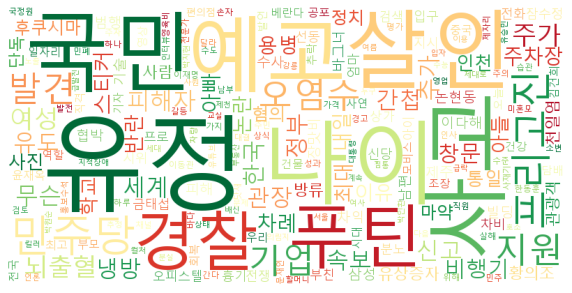

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = 'malgun',
                      background_color = 'white',
                      colormap = 'RdYlGn',
                      width = 800, height = 400
                     ).generate_from_frequencies(data)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

wordcloud.to_file(date+'_news.png')